In [1]:
from core.entity import (
    Xdf as Tune,
    Table
)
from core.entity.Base import Measurements, Units, UnitRegistry
import os, sys
import numpy as np
# jupyter specific stuff
import matplotlib.pyplot as plot

xdf_path = os.path.abspath('./cars/testing/volvo-motronic44-test/rev5b.xdf')
bin_path = os.path.abspath('./cars/testing/volvo-motronic44-test/607_rev5b.bin')
tune = Tune.Xdf.from_path(
    xdf_path, 
    bin_path,
    #Tune.AxisInterdependence
)

def plot_Table(table):
    #plot.ion()
    fig = plot.figure()
    axis = plot.axes(projection='3d')
    x, y = np.meshgrid(table.x.value.magnitude, table.y.value.magnitude)
    z = table.z.value.magnitude
    surface = axis.plot_surface(x, y, z, cmap='RdYlBu')
    # Add a color bar which maps values to colors.
    fig.colorbar(surface, shrink=0.5, aspect=5)
    axis.set_xlabel(f"{table.x.data_type if table.x.data_type else ''} ({table.x.unit})")
    axis.set_ylabel(f"{table.y.data_type if table.y.data_type else ''} ({table.y.unit})")
    axis.set_zlabel(f"{table.z.unit}")
    axis.set_title(table.title)
    plot.show()


ignition_map = tune.Tables[0]
functions = {f.title: f for f in tune.Functions}
linker = functions['linker normai']
zwb = tune.xpath('./XDFCONSTANT[1]')[0]


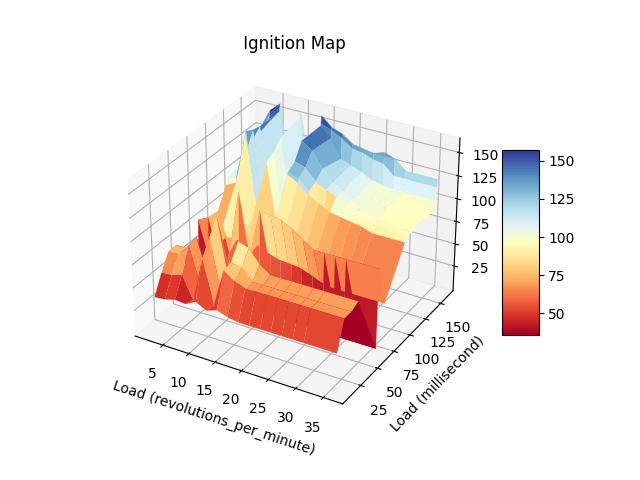

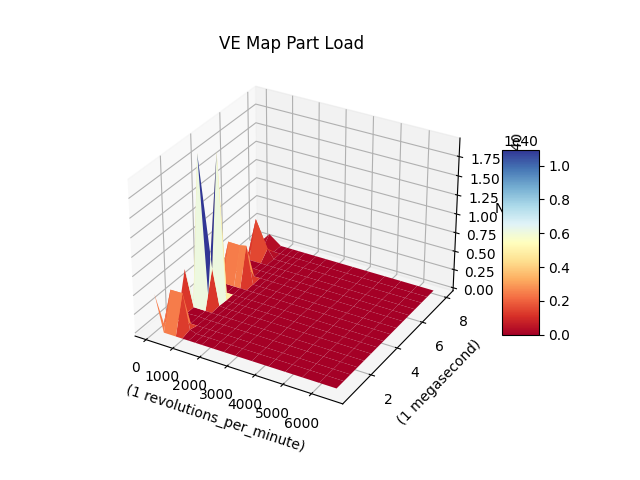

In [5]:
%matplotlib widget
#plot_Table(ignition_map)
t = tune.Tables[0]
#t.x.value, t.y.value
for t in tune.Tables[4:]:
    plot_Table(t)


In [7]:
try:
  zwb.value = 12.24 + 5
except Tune.EmbeddedValueError as e:
    raise(e)
    #print(f"Error setting value {e.val} out of logical bounds {e.min}, {e.max}")
    #print(zwb.value)

/home/david/serpentine/core/entity/EmbeddedData.py:128: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  combined = np.hstack(padded.values()) # type: ignore


EmbeddedValueError: Writing out-of-bounds values to memory map.

  17.240000000000002   >   12.24  
    